# 0. Mount Google Drive

In [16]:
from google.colab import drive

drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [7]:
# Check the directory
!ls "/content/gdrive/My Drive/Colab Notebooks"

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Data directory
data_dir = '/content/gdrive/My Drive/Colab Notebooks/data'

!ls '$data_dir'

# 1. Prepare Environment

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load Dataset

In this task, you will predict whether a passenger would survive
[[kaggle](https://www.kaggle.com/c/titanic)].

## Data Dictionary

| Variable  |        Definition                                    |                 Key                               |
|-----------------|--------------------------------------------|------------------------------------------------|
| survival        | Survival (label)                                  | 0 = No, 1 = Yes                                |
| pclass          | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex             | Sex                                        |                                                |
| Age             | Age in years                               |                                                |
| sibsp           | # of siblings / spouses aboard the Titanic |                                                |
| parch           | # of parents / children aboard the Titanic |                                                |
| ticket          | Ticket number                              |                                                |
| fare            | Passenger fare                             |                                                |
| cabin           | Cabin number                               |                                                |
| embarked        | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

We have already done some preprocessing on the data to simplify the next process. You can also try on the raw data.

First, you download the [titanic_data_cleaner.csv](https://drive.google.com/file/d/1TSXkI-2yMiWBHx3ylFVlZlW_Clvg9Dah/view?usp=sharing) and then upload it to your Google Drive. The recommended location is in the `Colab Notebooks/data` folder.

Then run the following command to read the csv file in your Google Drive.

In [21]:
data_path = os.path.join('titanic_data_cleaner.csv')
df = pd.read_csv(data_path)

In [22]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,UNK,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,UNK,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,UNK,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,UNK,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,UNK,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# 3. Data Preparation

In this section, we will prepare the dataset into a format that can be used to train models.

## 3.1 Feature Selection

How do we know which features can be used to predict whether the passenger will survided the crash?

* Domain Expert Knowledge
* Visual Inspection
* Feature Selection Algorithms (see more [link1](https://scikit-learn.org/stable/modules/feature_selection.html), [link2](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)) 




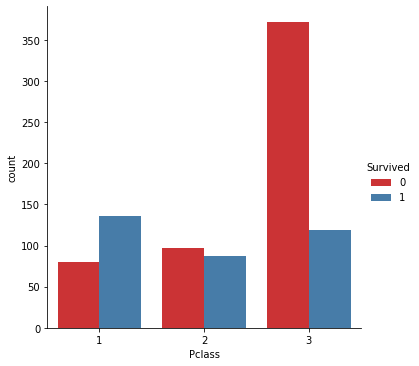

In [23]:
# Let's see the Pclass
sns.catplot(
    data=df, hue='Survived',
    x='Pclass', kind='count', palette='Set1')

How about the `'Sex'`, `'Embarked'` and `'Cabin'`?

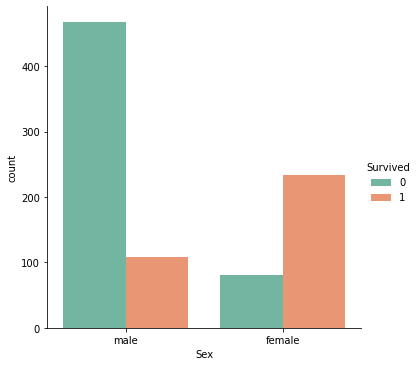

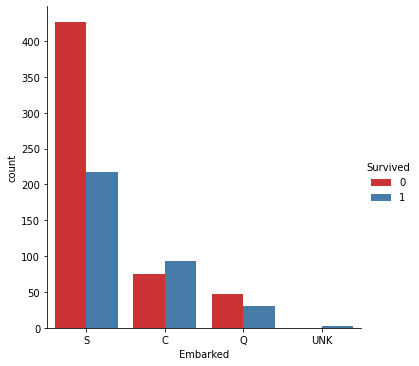

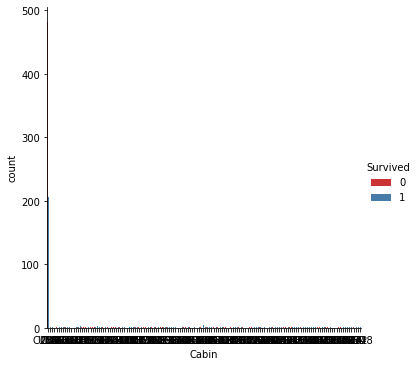

In [33]:
# YOUR CODE HERE
sns.catplot(
    data=df, hue='Survived',
    x='Sex', kind='count', palette='Set2')
sns.catplot(
    data=df, hue='Survived',
    x='Embarked', kind='count', palette='Set1')
sns.catplot(
    data=df, hue='Survived',
    x='Cabin', kind='count', palette='Set1')

Which feature should we use?

In [26]:
# YOUR CODE HERE
data_df = 

In [28]:
data_df

NameError: name 'data_df' is not defined

## 3.2 Categorical Columns

scikit-learn expects numerical tensors, so we have to convert our `str` data into number.

In [ ]:
from sklearn.preprocessing import LabelEncoder

sex_enc = LabelEncoder()

data_df['Sex_code'] = sex_enc.fit_transform(data_df['Sex'])
print(sex_enc.classes_)

data_df

In [ ]:
emb_df = pd.get_dummies(df['Embarked'], prefix='Embarked')
emb_df

In [ ]:
clean_df = pd.concat([data_df, emb_df], axis=1)
clean_df = clean_df.drop(columns=['Sex','Embarked'])
clean_df

# 4. Prepare Train/Valid/Test Sets

Here you write the code to extract the features and labels.

In [ ]:
# YOUR CODE HERE
X = None
y = None

Next we split the dataset into training/validation/test set.
* Training set: `X_train`, `y_train`
* Validation set: `X_valid`, `y_valid`
* Test set: `X_test`, `y_test`

The following is an example of how to split the dataset into a training and a test sets.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.20)  # 80:20
```

Here you will write the code to split `(X, y)` into `(X_train, y_train)`, `(X_valid, y_valid)` and `(X_test, y_test)` using 80/10/10 proportion.

In [ ]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

# 5. Model Selection

In this section, you will write code to train the model on the training set and evaluate it on the validation set.

Let's start by creating and training a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model, using the variable named `model`.

In [ ]:
# YOUR CODE HERE

Next, we use the trained model to predict whether the passengers in both the training and the validation sets will survive the titanic crash or not.

The predictions for the training and the validation set are stored in `y_hat_train` and `y_hat_valid`.

In [ ]:
y_hat_train = # YOUR CODE HERE
y_hat_valid = # YOUR CODE HERE

Then we determine the prediction performance on the training and the validation set to investigate whether our model has the **underfitting** or **overfitting** problems or not.

Here, we use the common metrics for classification problems which are: **accuracy, precision, recall and f1-score**.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
# print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.2f}')
# print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
# print(f'Precision: {precision_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
# print(f'Recall: {recall_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')

**TODO**: Go back to update the parameters of the model to minimize the overfitting and the underfitting as much as you can.

Once you are happy with the performance, then we proceed to the next step.

# 6. Evaluation on Test Set

Once we found a best model, we then evaluate the trained model with the test set to estimate the performance on the **unseen** examples.

The predictions for the test set are stored in `y_hat_test`.

In [ ]:
# YOUR CODE HERE

In [ ]:
print('Test Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
# print(f'Precision: {precision_score(y_true=y_test, y_pred=y_hat_test):.2f}')
# print(f'Recall: {recall_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.2f}')

This should be the performance that you will put in the report.

# 7. Try Other Classifiers

There are a large number of supervised-ML algorithms that you can use. Please try other classifiers below and try to achieve the best performance on the test set.

* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html): try to change `C` and `penalty`.
* [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): try to change `C`, `gamma`.
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): try to change `n_estimators`, `max_depth`, `min_samples_leaf`.

## Feature Scaling

Please note that **feature scaling** is essential for machine learning algorithms that calculate distances between data (except DecisionTree, RandomForest, XGBoost, etc.). This is to prevent the features with a larger range dominate the smaller ones. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Scikit-learn provides several functions that we can use to scale the range of all features to be in the similar range.

* [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

For example,

```python
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
scaler = RobustScaler()
scaler.fit(X)
 
scaled_X = scaler.transform(X)
 
print(scaled_X)
print(f'Mean: {np.mean(scaled_X, axis=0)}')
print(f'Std: {np.std(scaled_X, axis=0)}')

# Output
# [[ 0.  -2.   0. ]
#  [-1.   0.   0.4]
#  [ 1.   0.  -1.6]]
# Mean: [ 0.         -0.66666667 -0.4       ]
# Std: [0.81649658 0.94280904 0.86409876]
```

**IMPORTANT**

The scaler should be **fitted (i.e.,** `scaler.fit(X)`) **to the training set only**. This is to prevent the scaler from observing unseen data. The fitted scaler is then used to transform (i.e., `scaler.transform(X)`) the validation and the test sets before the prediction.

**TODO**

1. Try the other classifiers as specified above.

1. Modify Step 5 and 6 to include the feature selection, except when you are using the DecisionTree or the RandomForestClassifier.